In [29]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("divyansh22/summer-olympics-medals")

print("Path to dataset files:", path)

100%|██████████| 219k/219k [00:00<00:00, 270kB/s]

Extracting files...
Path to dataset files: C:\Users\USER\.cache\kagglehub\datasets\divyansh22\summer-olympics-medals\versions\2


In [30]:
#Impot libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
#Import Exploration Cleanup Data

df = pd.read_csv('E:\Projects\Summer-Olympics-Medals\Summer-Olympic-medals-1976-to-2008.csv', encoding='latin-1')
df.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


In [32]:
df.shape

(15433, 11)

In [33]:
df.dtypes

City             object
Year            float64
Sport            object
Discipline       object
Event            object
Athlete          object
Gender           object
Country_Code     object
Country          object
Event_gender     object
Medal            object
dtype: object

In [34]:
df.columns

Index(['City', 'Year', 'Sport', 'Discipline', 'Event', 'Athlete', 'Gender',
       'Country_Code', 'Country', 'Event_gender', 'Medal'],
      dtype='object')

In [35]:
df['Year'].unique()

array([1976.,   nan, 1980., 1984., 1988., 1992., 1996., 2000., 2004.,
       2008.])

In [36]:
df['City'].unique()

array(['Montreal', nan, 'Moscow', 'Los Angeles', 'Seoul', 'Barcelona',
       'Atlanta', 'Sydney', 'Athens', 'Beijing'], dtype=object)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15433 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15316 non-null  object 
 1   Year          15316 non-null  float64
 2   Sport         15316 non-null  object 
 3   Discipline    15316 non-null  object 
 4   Event         15316 non-null  object 
 5   Athlete       15316 non-null  object 
 6   Gender        15316 non-null  object 
 7   Country_Code  15316 non-null  object 
 8   Country       15316 non-null  object 
 9   Event_gender  15316 non-null  object 
 10  Medal         15316 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.3+ MB


In [38]:
df[df.isnull().any(axis=1)]

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
774,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
df.isnull().sum()

City            117
Year            117
Sport           117
Discipline      117
Event           117
Athlete         117
Gender          117
Country_Code    117
Country         117
Event_gender    117
Medal           117
dtype: int64

In [40]:
#Cleanup Data and Remoce Null Values

df.dropna(inplace=True)
df.shape

(15316, 11)

In [41]:
athlete_per_year = df.Year.value_counts()
athlete_per_year

Year
2008.0    2042
2000.0    2015
2004.0    1998
1996.0    1859
1992.0    1705
1988.0    1546
1984.0    1459
1980.0    1387
1976.0    1305
Name: count, dtype: int64

In [42]:
number_of_athlete_by_year = athlete_per_year.sort_index()
number_of_athlete_by_year

Year
1976.0    1305
1980.0    1387
1984.0    1459
1988.0    1546
1992.0    1705
1996.0    1859
2000.0    2015
2004.0    1998
2008.0    2042
Name: count, dtype: int64

Text(0, 0.5, 'No. of Athletes')

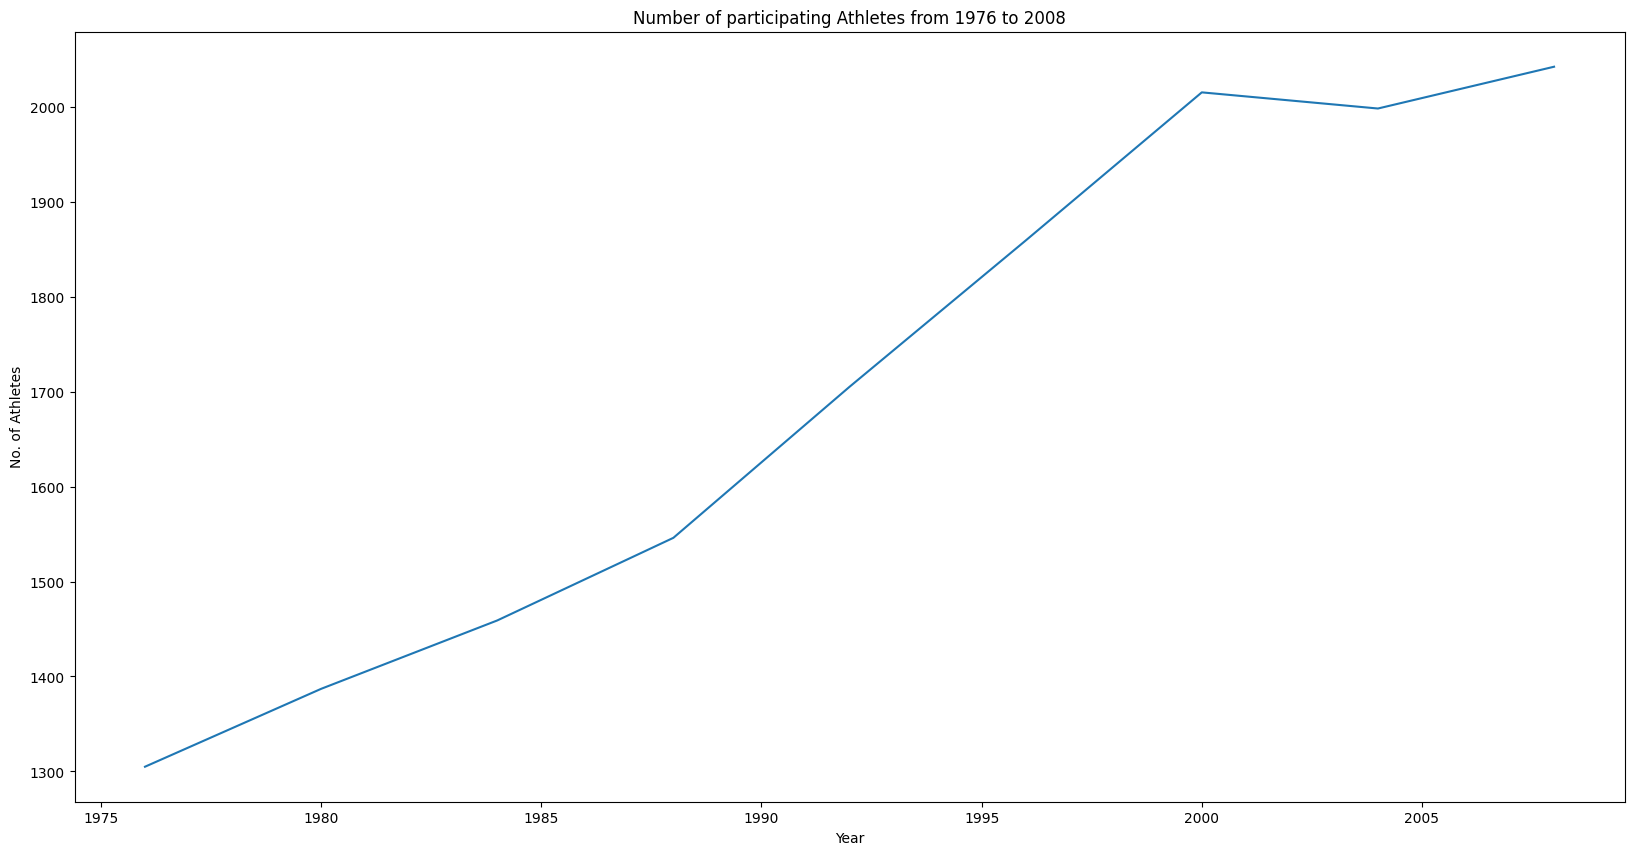

In [43]:
plt.figure(figsize=(20,10))
number_of_athlete_by_year.plot()
plt.title('Number of participating Athletes from 1976 to 2008')
plt.xlabel('Year')
plt.ylabel('No. of Athletes')

In [44]:
gender_grouped_by_men = df[['Year', 'Gender', 'Medal']][df['Gender'] == 'Men'].groupby(['Year', 'Gender']).count()
gender_grouped_by_women = df[['Year', 'Gender', 'Medal']][df['Gender'] == 'Women'].groupby(['Year', 'Gender']).count()

pd.merge(gender_grouped_by_men, gender_grouped_by_women, how='inner', on='Year', suffixes=('_men', '_women'))

,Medal_men,Medal_women
Year,,
1976.0,924,381
1980.0,958,429
1984.0,973,486
1988.0,1011,535
1992.0,1105,600
1996.0,1082,777
2000.0,1126,889
2004.0,1099,899
2008.0,1110,932


Text(0.5, 1.0, 'Participants by Gender over Time')

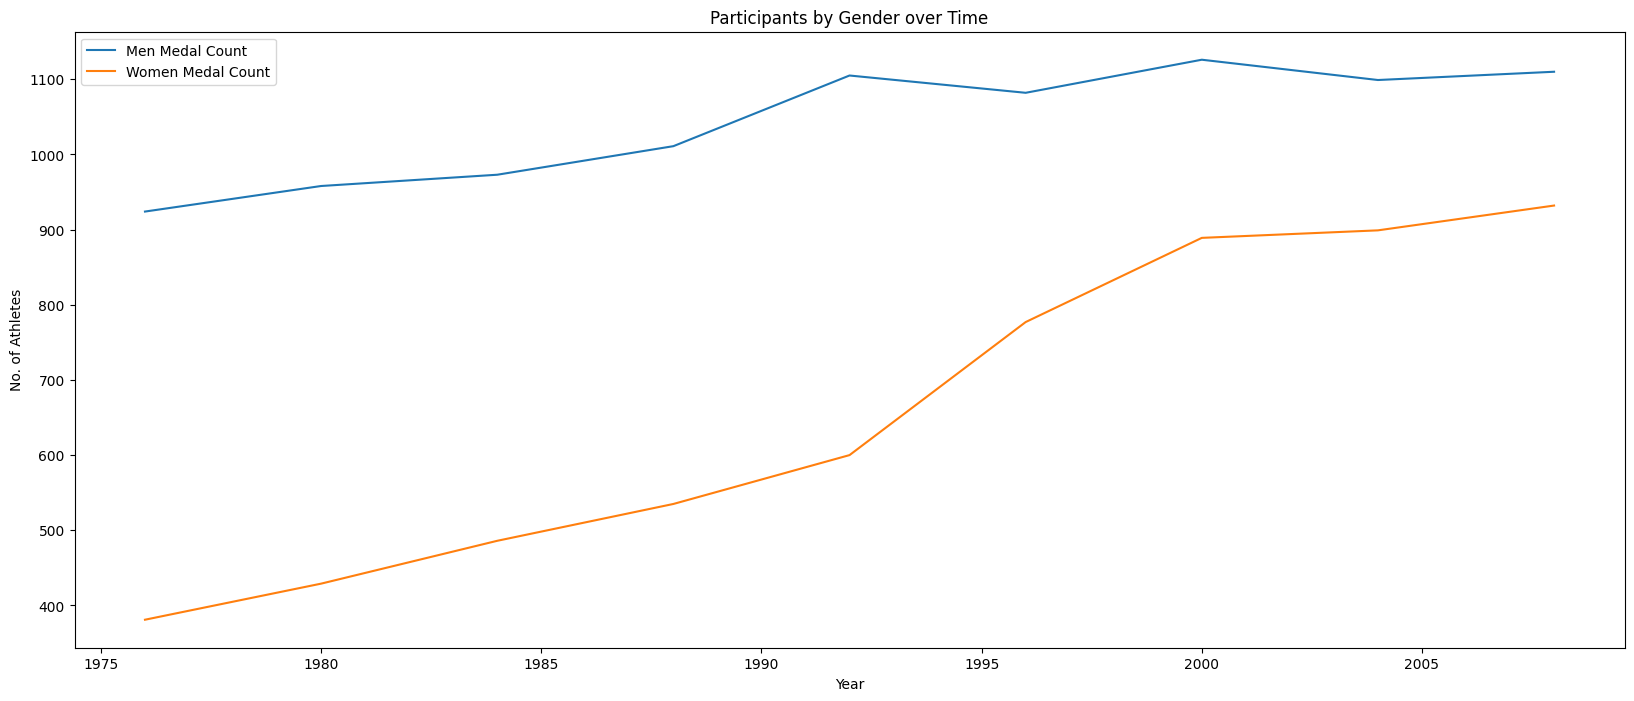

In [45]:
pd.merge(gender_grouped_by_men, gender_grouped_by_women, how='inner', on='Year', suffixes=('_men', '_women')).rename(columns={'Medal_men':'Men Medal Count', 'Medal_women':'Women Medal Count'}).plot(figsize=(20,8))
plt.ylabel('No. of Athletes')
plt.title('Participants by Gender over Time')

Text(0.5, 1.0, 'All Time Medals of the top 25 Countries')

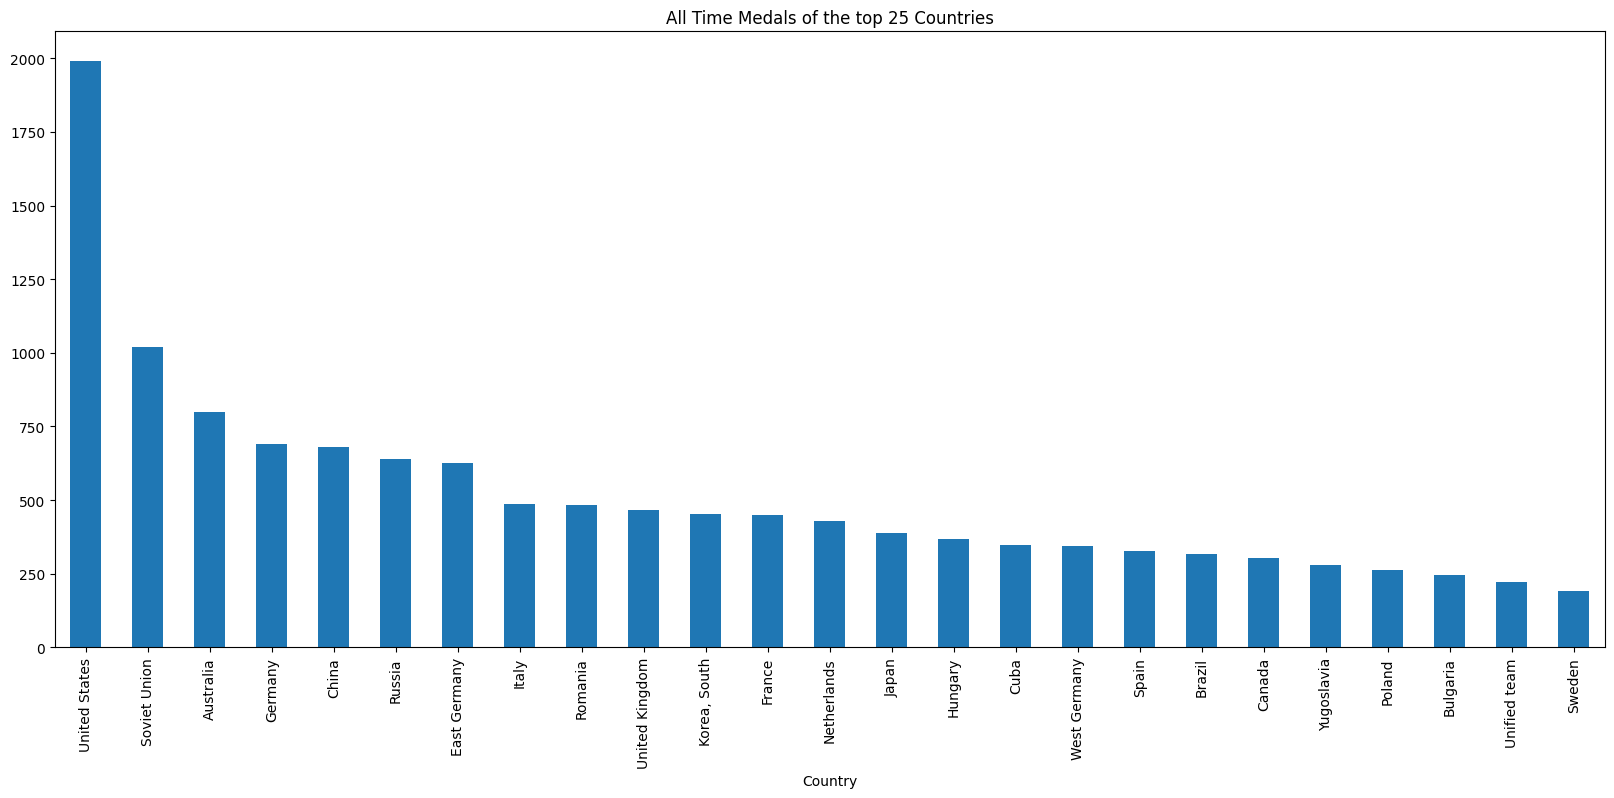

In [46]:
df = df['Country'].value_counts().sort_values(ascending=False)
all_countries = df[:25]
all_countries.plot(kind='bar', figsize=(20,8))
plt.title('All Time Medals of the top 25 Countries')